In [29]:
import pandas as pd

df = pd.read_csv('./table_data_a10996f7-3a7c-49eb-ba3c-bf682effc883.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain_Strand  450 non-null    object
 1   Sequence       450 non-null    object
 2   Trial          450 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.7+ KB


In [17]:
list_segment = df['Domain_Strand'].unique().tolist()[:38]
list_segment

['ABS',
 'ABS*',
 'ABS_',
 'ABS_*',
 'ATS',
 'ATS*',
 'Complementstart',
 'Complementstart*',
 'DBSCom',
 'DBSCom*',
 'Loop',
 'Loop*',
 'RBS',
 'RBS*',
 'StartCodon',
 'StartCodon*',
 '_DBS',
 '_DBS*',
 'loopCom',
 'loopCom*',
 'loopRBS',
 'loopRBS*',
 'miR21',
 'miR21*',
 'miR21bottomseal1',
 'miR21bottomseal1*',
 'miR21bottomseal2',
 'miR21bottomseal2*',
 'miR21topseal',
 'miR21topseal*',
 'miR92a',
 'miR92a*',
 'miR92bottomseal1',
 'miR92bottomseal1*',
 'miR92bottomseal2',
 'miR92bottomseal2*',
 'miR92topseal',
 'miR92topseal*']

In [18]:
for j in list_segment:
    print(df.loc[df['Domain_Strand'] == str(j), 'Sequence'].values[0])

ggggC
gCCCC
UU
AA
UAUUUUUUU
AAAAAAAUA
CAU
AUg
gCUUC
gAAgC
UU
AA
UAgAggAgAUg
CAUCUCCUCUA
AUg
CAU
Ag
CU
Cg
Cg
AC
gU
UAgCUUAUCAgACUgAUgUUgA
UCAACAUCAgUCUgAUAAgCUA
AUUAUAUUCUAUU
AAUAgAAUAUAAU
gAUAgAAUgUAAU
AUUACAUUCUAUC
AAAACUgA
UCAgUUUU
UAUUgCACUUgUCCCggCCUgU
ACAggCCgggACAAgUgCAAUA
UUUAUUUUUUgUC
gACAAAAAAUAAA
AAUAAAAAAUgAg
CUCAUUUUUUAUU
AgAUAUgU
ACAUAUCU


# Analysis Job

In [5]:
import numpy as np
# np.array2string(
str.upper((df.loc[(df['Trial'] == 1) & (df['Domain_Strand'] == 'LiRA'), 'Sequence'].values)[0])

'GAGGCCAUUGUAUGUCUUUUCGAGAGGCAAGUGUCUCAACAUCAGUCUGAUAAGCUAAUGGUGUUGUGAUACUUGCUUCGGACGCGGAGGUCACAGGCCGGGACAAGUGCAAUACGGUUUGUUACCUCCGUGUCCUAGAGGAGAUGGUCGAUGGCUUC'

In [4]:
# seq = str.upper((df.loc[(df['Trial'] == 1) & (df['Domain_Strand'] == 'LiRA'), 'Sequence'].values)[0])
mir21 = 'UAGCUUAUCAGACUGAUGUUGA'
mir92a = 'UAUUGCACUUGUCCCGGCCUGU'

In [6]:
seq

'GGGGCCAUUUUUUAUUUUUUUACAUUAUAUUCUAUUUCAACAUCAGUCUGAUAAGCUAAAAACUGAGAUAGAAUGUAAUUUUAUUUUUUGUCACAGGCCGGGACAAGUGCAAUAAGAUAUGUAAUAAAAAAUGAGUAGAGGAGAUGCGAGAUGGCUUC'

In [5]:
import nupack
from nupack import *
mir21 = 'UAGCUUAUCAGACUGAUGUUGA'
mir92a = 'UAUUGCACUUGUCCCGGCCUGU'
# specify strands
a = Strand(sequence, name='a')
b = Strand(mir21, name='b')
c = Strand(mir92a, name='c')

# specify tubes
t1 = Tube(strands={a: 1e-6, b: 1e-6, c: 1e-6}, complexes=SetSpec(max_size=3, include=[[a,b], [a,c], [a,b,c]]), name='t1')
# t2 = Tube(strands={a: 1e-10, b: 1e-9}, complexes=SetSpec(max_size=2), name='t2')

# analyze tubes
model1 = Model()
tube_results = tube_analysis(tubes=[t1], model=model1, compute=['mfe','ensemble_size'])

In [8]:
print(a)

UCAUUACACAUCUCCUGGGCACAAGCAUCAACAUCAGUCUGAUAAGCUAUUGAGUAUUGUGCAUACAAUACACAGGCCGGGACAAGUGCAAUACUGUCCGUUGUAUAGAGGAGAUGACAAAUGGCUUC


In [19]:
tube_results

Complex,Pfunc,ΔG (kcal/mol),MFE (kcal/mol),Ensemble size
(a),1.0498e+22,-31.251,-28.427,2.626e+37
(b),6.4417e+1,-2.567,-1.099,159383
(c),3.6323e+0,-0.795,0.000,72369
(a+a),1.9478e+51,-72.787,-67.983,1.814e+78
(a+b),4.0603e+42,-60.467,-58.026,7.388e+45
(a+c),2.1544e+45,-64.334,-60.053,2.364e+45
(b+b),1.4079e+12,-17.240,-15.679,5.380e+12
(b+c),5.7465e+6,-9.592,-8.704,6.087e+12
(c+c),4.2841e+8,-12.250,-12.032,1.029e+12
(a+a+a),2.8035e+78,-111.328,-102.515,2.518e+119


In [6]:
tube_results.complexes

{<Complex (a+c+b)>: nupack.analysis.ComplexResult({model: Model('stacking', 'rna06.json', T=310.15 K), pfunc: 1.009404380723032555213540986E+82, free_energy: -116.37451350430507, mfe_stack: -111.06270599365234, ensemble_size: 414967042492839361743344700300000000000000000000000000000000000000, mfe: [StructureEnergy(Structure('.((((..((((.(.((.....)).).))))..))))(((((((((((((((((((((..(((((....)))))..(((((....)))))...((((((((((((((((((((((......(((((..((((.(((....))).))))..).))))...+))))))))))))))))))))))+))))))))))))))))))))).'), energy=-113.49638366699219, stack_energy=-111.06270599365234), StructureEnergy(Structure('.((((..((((.(.((.....)).).))))..))))(((((((((((((((((((((..(((((....)))))..(((((....)))))...((((((((((((((((((((((......(((((..((((.(((....))).))))..).))))...+))))))))))))))))))))))+))))))))))))))))))))).'), energy=-113.49638366699219, stack_energy=-111.06270599365234)]}),
 <Complex (a+b+b)>: nupack.analysis.ComplexResult({model: Model('stacking', 'rna06.json', T=310.15 K)

In [34]:

# Split the ASCII result into lines
lines = str(tube_results).split('\n')

# Extract the column names
columns = lines[0].split()

# Create an empty list to store the data rows
data = []

# Iterate over the lines starting from the second line
for line in lines[1:]:
    # Split the line into individual values
    values = line.split()
    # Append the values as a row to the data list
    data.append(values)
# print(data)
# Iterate through the list and find the index containing 'Concentration'
index = None
for i, sublist in enumerate(data):
    if 'Concentration' in sublist:
        index = i
        break

# Print the index
print(index)
print(data[index+1:])
new_data = data[index+1:]
# Create the dataframe
concen = pd.DataFrame(new_data[1:], columns=new_data[0][:-1], )

# Print the dataframe
print(concen)

21
[['Complex', 't1', '(M)'], ['(a+c+b)', '9.115e-07'], ['(a+c)', '6.768e-08'], ['(b)', '5.341e-08'], ['(a)', '2.080e-08'], ['(c)', '2.029e-08'], ['(b+b)', '1.755e-08'], ['(c+c)', '2.425e-10'], ['(a+c+c)', '2.903e-11'], ['(a+b+c)', '1.525e-11'], ['(a+a+c)', '1.415e-12'], ['(b+b+b)', '6.300e-13'], ['(b+c)', '4.827e-13'], ['(a+a)', '2.378e-13'], ['(a+b)', '1.793e-13'], ['(b+b+c)', '4.695e-14'], ['(c+c+c)', '2.404e-14'], ['(b+c+c)', '3.664e-15'], ['(a+b+b)', '4.558e-16'], ['(a+a+b)', '9.750e-18'], ['(a+a+a)', '4.091e-18']]
    Complex         t1
0   (a+c+b)  9.115e-07
1     (a+c)  6.768e-08
2       (b)  5.341e-08
3       (a)  2.080e-08
4       (c)  2.029e-08
5     (b+b)  1.755e-08
6     (c+c)  2.425e-10
7   (a+c+c)  2.903e-11
8   (a+b+c)  1.525e-11
9   (a+a+c)  1.415e-12
10  (b+b+b)  6.300e-13
11    (b+c)  4.827e-13
12    (a+a)  2.378e-13
13    (a+b)  1.793e-13
14  (b+b+c)  4.695e-14
15  (c+c+c)  2.404e-14
16  (b+c+c)  3.664e-15
17  (a+b+b)  4.558e-16
18  (a+a+b)  9.750e-18
19  (a+a+a)  4

3

In [58]:
concen['t1'] = concen['t1'].astype(float)
value = concen.loc[concen['Complex'] == '(a)', 't1'].values[0]
print(value)
index = concen.index[concen['Complex'] == '(a)'][0]
print(index+1)

2.08e-08
4


In [7]:
list(tube_results.complexes.keys())[0] == c

False

In [8]:
tube_results.complexes[Complex([a], name='(a)')]

nupack.analysis.ComplexResult({model: Model('stacking', 'rna06.json', T=310.15 K), pfunc: 3.509753546072976737879323565E+59, free_energy: -84.50254975355385, mfe_stack: -82.94309997558594, ensemble_size: 115401366264471615304717947600000000000000000000000, mfe: [StructureEnergy(Structure('((((((((((..(((((((((..((((((((((((.((((((((..............)))))))).))))))))))))((((((((((((.((((((((..............)))))))).))))))))))))..)))))))))..))))))))))'), energy=-83.49585723876953, stack_energy=-82.94309997558594)]})

In [7]:
# save data into format dictionary in each sequence
data = dict()
data['sequence'] = seq
data[str(c1.name) + '_mfe'] =  tube_results.complexes[c1].mfe_stack
data[str(c1.name) + '_target']  = str(tube_results.complexes[c1].mfe[0][0])
data[str(c1.name) + '_pfunc'] =  tube_results.complexes[c1].pfunc
data[str(c1.name) + '_free_energy'] =  tube_results.complexes[c1].free_energy
data[str(c1.name) + '_ensemble_size'] =  tube_results.complexes[c1].ensemble_size
data[str(c1.name) + '_mfe_energy'] =  tube_results.complexes[c1].mfe_stack
data[str(c1.name) + '_mfe_stack_energy'] =  tube_results.complexes[c1].mfe[0][2]

NameError: name 'tube_results' is not defined

In [33]:
import nupack
from nupack import *
def get_rbs_index(c):
    a = ''
    for i in c.strands:
        a += str(i)
    rbs = "UAGAGGAGAUG"
    index = a.find(rbs)
    return(int(index))

def calculate_gc_percentage(string):
    gc_count = string.count("G") + string.count("C")
    total_count = len(string)
    gc_percentage = (gc_count / total_count) * 100

    return(gc_percentage)

import re
import numpy as np
def check_illegal_sites(sequence, enzymes):  
    illegal_sites = 0
    for enzyme, site in enzymes.items():
        matches = re.finditer(site, sequence)
        for match in matches:
            illegal_sites += 1

    return(illegal_sites)

def get_index(text):
    periods = []
    parentheses = []

    for match in re.finditer(r'\.|[()]', text):
        if match.group() == '.':
            periods.append(match.start())
        elif match.group() == '(' or match.group() == ')':
            parentheses.append(match.start())
    return periods, parentheses

def get_prob(matrix):
    # Get non-zero values and their coordinates in each row
    # Get maximum value and its index in each row
    max_values = [np.max(matrix[row]) for row in range(matrix.shape[0])]
    max_indices = [np.argmax(matrix[row]) for row in range(matrix.shape[0])]
    return [max_values, max_indices]
    
def get_probability_onoff(index, data):
    prob = []
    for i in index:
        prob.append(data[i])
    return prob

def on_off(text, data):
    periods, parentheses = get_index(text)
    prob_on  = []
    prob_off = [] 
    prob_on = get_probability_onoff(periods, data)
    prob_off = get_probability_onoff(parentheses, data)
    return(prob_on, prob_off)

def on_off_level(text, data):
    periods, parentheses = get_index(text)
    prob_on  = []
    prob_off = [] 
    prob_on = get_probability_onoff(periods, data)
    prob_off = get_probability_onoff(parentheses, data)
    on_level = sum(prob_on)/len(text)
    off_level = sum(prob_off)/len(text)
    return(off_level, on_level)

def stats(lists):
    try:
        mean = sum(lists) / len(lists)
        squared_differences = [(x - mean)**2 for x in lists]
        variance = sum(squared_differences) / len(lists)
        standard_deviation = variance**0.5
        sum_res = sum(lists)

        return(mean, sum_res, standard_deviation)
    except ZeroDivisionError:
        print("Error: Division by zero.")
        return 0, 0, 0

def get_analyze(t, df):
    seq = str.upper((df.loc[(df['Trial'] == t) & (df['Domain_Strand'] == 'LiRA'), 'Sequence'].values)[0])
    mir21 = 'UAGCUUAUCAGACUGAUGUUGA'
    mir92a = 'UAUUGCACUUGUCCCGGCCUGU'
    
    
    # define illegal sites enzymes
    '''
    Ecori: GAATTC GAAUUC
    Xbai: TCTAGA UCUAGA
    Spei: ACTAGT ACUAGU
    Psti: CTGCAG CUGCAG
    noti:GCGGCCGC
    '''
    enzymes = {
      "EcoRI": "GAATTC",
      "EcoRI2": "GAAUUC",
      "XbaI": "TCTAGA",
      "XbaI2": "UCUAGA",
      "SpeI": "ACTAGT",
      "SpeI2": "ACUAGU",
      "PstI": "CTGCAG",
      "PstI2": "CUGCAG",
      "NotI": "GCGGCCGC"
    }
    # analysis job

    # specify strands
    a = Strand(seq, name='a')
    b = Strand(mir21, name='b')
    c = Strand(mir92a, name='c')

    # specify tubes
    t1 = Tube(strands={a: 1e-6, b: 1e-6, c: 1e-6}, complexes=SetSpec(max_size=3, include=[[a,b], [a,c], [a,b,c]]), name='t1')
    # t2 = Tube(strands={a: 1e-10, b: 1e-9}, complexes=SetSpec(max_size=2), name='t2')

    # analyze tubes
    model1 = Model()
    tube_results = tube_analysis(tubes=[t1], model=model1, compute=['mfe','ensemble_size'])
    
    # Split the ASCII result into lines
    lines = str(tube_results).split('\n')

    # Extract the column names
    columns = lines[0].split()

    # Create an empty list to store the data rows
    concen_data = []

    # Iterate over the lines starting from the second line
    for line in lines[1:]:
        # Split the line into individual values
        values = line.split()
        # Append the values as a row to the data list
        concen_data.append(values)
    
    # Iterate through the list and find the index containing 'Concentration'
    index = None
    for i, sublist in enumerate(concen_data):
        if 'Concentration' in sublist:
            index = i
            break

    new_data = concen_data[index+1:]
    # Create the dataframe
    concen = pd.DataFrame(new_data[1:], columns=new_data[0][:-1], )

    #  data get from each sequence
    c0 = Complex([a], name='(a)')
    c1 = Complex([a, c, b], name='(a+c+b)')
    c2 = Complex([a, b, c], name='(a+b+c)')
    c3 = Complex([a, b], name='(a+b)')
    c4 = Complex([a, c], name='(a+c)')
    c5 = Complex([a, a], name='(a+a)')
    
    data = dict ()
    data['sequence'] = seq
    for c in [c0, c1, c2, c3, c4, c5]:
        data[str(c.name) + '_mfe'] =  tube_results.complexes[c].mfe_stack
        data[str(c.name) + '_target']  = str(tube_results.complexes[c].mfe[0][0])
        data[str(c.name) + '_pfunc'] =  tube_results.complexes[c].pfunc
        data[str(c.name) + '_free_energy'] =  tube_results.complexes[c].free_energy
        data[str(c.name) + '_ensemble_size'] =  tube_results.complexes[c].ensemble_size
        data[str(c.name) + '_mfe_energy'] =  tube_results.complexes[c].mfe_stack
        data[str(c.name) + '_mfe_stack_energy'] =  tube_results.complexes[c].mfe[0][2]
        data[str(c.name) + '_t1'] = concen.loc[concen['Complex'] == str(c.name), 't1'].values[0]
        data[str(c.name) + '_t1_rank'] = concen.index[concen['Complex'] == str(c.name)][0]
        data['on_' + str(c.name)] = len(re.findall(r'\.', str(tube_results.complexes[c].mfe[0][0]))[get_rbs_index(c):get_rbs_index(c)+18])
        print(get_rbs_index(c))
        data['off_'+ str(c.name)] = len(re.findall(r'[()]', str(tube_results.complexes[c].mfe[0][0]))[get_rbs_index(c):get_rbs_index(c)+18])
        data['prob_matrix_'+ str(c.name)] = pairs(c, model=model1).to_array()
        
        data['prob_' + str(c.name)] = get_prob(pairs(c, model=model1).to_array())[0]
        data['prob_on_' + str(c.name)], data['prob_off_' + str(c.name)] = on_off(str(tube_results.complexes[c].mfe[0][0])[get_rbs_index(c):get_rbs_index(c)+18], data['prob_' + str(c.name)])
        data['on_level_' + str(c.name)], data['off_level_' + str(c.name)] = on_off_level(str(tube_results.complexes[c].mfe[0][0])[get_rbs_index(c):get_rbs_index(c)+18], data['prob_' + str(c.name)])
        data['on_mean_' + str(c.name)], data['on_sum_' + str(c.name)], data['on_stdev_' + str(c.name)] = stats(data['prob_on_' + str(c.name)])
        data['off_mean_' + str(c.name)], data['off_sum_' + str(c.name)], data['off_stdev_' + str(c.name)] = stats(data['prob_off_' + str(c.name)])
    
    data['defect'] = defect(strands=[seq], structure=data['(a)_target'], model=model1)
    data['structure_prob'] = structure_probability(strands=[seq], structure=data['(a)_target'], model=model1)
    # data['prob_matrix'] = pairs(strands=[seq], model=model1).to_array()
    # data['prob_diagonal'] = np.diagonal(pairs(strands=[seq], model=model1).to_array())
    data['gc_content'] = calculate_gc_percentage(seq)
    data['illegal_count'] = check_illegal_sites(seq, enzymes)
    return(data)

In [40]:
sequence = 'UCAUUACACAUCUCCUGGGCACAAGCAUCAACAUCAGUCUGAUAAGCUAUUGAGUAUUGUGCAUACAAUACACAGGCCGGGACAAGUGCAAUACUGUCCGUUGUAUAGAGGAGAUGACAAAUGGCUUC'

In [2]:
sequence[index:index+18]

'UAGAGGAGAUGACAAAUG'

In [31]:
import nupack
from nupack import *
sequence = 'UCAUUACACAUCUCCUGGGCACAAGCAUCAACAUCAGUCUGAUAAGCUAUUGAGUAUUGUGCAUACAAUACACAGGCCGGGACAAGUGCAAUACUGUCCGUUGUAUAGAGGAGAUGACAAAUGGCUUC'

In [41]:
# seq = str.upper((df.loc[(df['Trial'] == t) & (df['Domain_Strand'] == 'LiRA'), 'Sequence'].values)[0])
def get_data_one_seq(seq):
    mir21 = 'UAGCUUAUCAGACUGAUGUUGA'
    mir92a = 'UAUUGCACUUGUCCCGGCCUGU'
    
    
    # define illegal sites enzymes
    '''
    Ecori: GAATTC GAAUUC
    Xbai: TCTAGA UCUAGA
    Spei: ACTAGT ACUAGU
    Psti: CTGCAG CUGCAG
    noti:GCGGCCGC
    '''
    enzymes = {
      "EcoRI": "GAATTC",
      "EcoRI2": "GAAUUC",
      "XbaI": "TCTAGA",
      "XbaI2": "UCUAGA",
      "SpeI": "ACTAGT",
      "SpeI2": "ACUAGU",
      "PstI": "CTGCAG",
      "PstI2": "CUGCAG",
      "NotI": "GCGGCCGC"
    }
    # analysis job

    # specify strands
    a = Strand(seq, name='a')
    b = Strand(mir21, name='b')
    c = Strand(mir92a, name='c')

    # specify tubes
    t1 = Tube(strands={a: 1e-6, b: 1e-6, c: 1e-6}, complexes=SetSpec(max_size=3, include=[[a,b], [a,c], [a,b,c]]), name='t1')
    # t2 = Tube(strands={a: 1e-10, b: 1e-9}, complexes=SetSpec(max_size=2), name='t2')

    # analyze tubes
    model1 = Model()
    tube_results = tube_analysis(tubes=[t1], model=model1, compute=['mfe','ensemble_size'])
    
    # Split the ASCII result into lines
    lines = str(tube_results).split('\n')

    # Extract the column names
    columns = lines[0].split()

    # Create an empty list to store the data rows
    concen_data = []

    # Iterate over the lines starting from the second line
    for line in lines[1:]:
        # Split the line into individual values
        values = line.split()
        # Append the values as a row to the data list
        concen_data.append(values)
    
    # Iterate through the list and find the index containing 'Concentration'
    index = None
    for i, sublist in enumerate(concen_data):
        if 'Concentration' in sublist:
            index = i
            break

    new_data = concen_data[index+1:]
    # Create the dataframe
    concen = pd.DataFrame(new_data[1:], columns=new_data[0][:-1], )

    #  data get from each sequence
    c0 = Complex([a], name='(a)')
    c1 = Complex([b, a, c], name='(b+a+c)')
    c2 = Complex([a, b, c], name='(a+b+c)')
    c3 = Complex([a, b], name='(a+b)')
    c4 = Complex([a, c], name='(a+c)')
    c5 = Complex([a, a], name='(a+a)')
    
    data = dict ()
    data['sequence'] = seq
    for c in [c0, c1, c2, c3, c4, c5]:
        print(c)
        data[str(c.name) + '_mfe'] =  tube_results.complexes[c].mfe_stack
        data[str(c.name) + '_target']  = str(tube_results.complexes[c].mfe[0][0])
        data[str(c.name) + '_pfunc'] =  tube_results.complexes[c].pfunc
        data[str(c.name) + '_free_energy'] =  tube_results.complexes[c].free_energy
        data[str(c.name) + '_ensemble_size'] =  tube_results.complexes[c].ensemble_size
        data[str(c.name) + '_mfe_energy'] =  tube_results.complexes[c].mfe_stack
        data[str(c.name) + '_mfe_stack_energy'] =  tube_results.complexes[c].mfe[0][2]
        data[str(c.name) + '_t1'] = concen.loc[concen['Complex'] == str(c.name), 't1'].values[0]
        data[str(c.name) + '_t1_rank'] = concen.index[concen['Complex'] == str(c.name)][0]
        data['on_' + str(c.name)] = len(re.findall(r'\.', str(tube_results.complexes[c].mfe[0][0]))[get_rbs_index(c):get_rbs_index(c)+18])
        data['off_'+ str(c.name)] = len(re.findall(r'[()]', str(tube_results.complexes[c].mfe[0][0]))[get_rbs_index(c):get_rbs_index(c)+18])
        data['prob_matrix_'+ str(c.name)] = pairs(c, model=model1).to_array()
        print(get_rbs_index(c))
        
        data['prob_' + str(c.name)] = get_prob(pairs(c, model=model1).to_array())[0]
        data['prob_on_' + str(c.name)], data['prob_off_' + str(c.name)] = on_off(str(tube_results.complexes[c].mfe[0][0])[get_rbs_index(c):get_rbs_index(c)+18], data['prob_' + str(c.name)])
        data['on_level_' + str(c.name)], data['off_level_' + str(c.name)] = on_off_level(str(tube_results.complexes[c].mfe[0][0])[get_rbs_index(c):get_rbs_index(c)+18], data['prob_' + str(c.name)])
        data['on_mean_' + str(c.name)], data['on_sum_' + str(c.name)], data['on_stdev_' + str(c.name)] = stats(data['prob_on_' + str(c.name)])
        data['off_mean_' + str(c.name)], data['off_sum_' + str(c.name)], data['off_stdev_' + str(c.name)] = stats(data['prob_off_' + str(c.name)])
    
    data['defect'] = defect(strands=[seq], structure=data['(a)_target'], model=model1)
    data['structure_prob'] = structure_probability(strands=[seq], structure=data['(a)_target'], model=model1)
    # data['prob_matrix'] = pairs(strands=[seq], model=model1).to_array()
    # data['prob_diagonal'] = np.diagonal(pairs(strands=[seq], model=model1).to_array())
    data['gc_content'] = calculate_gc_percentage(seq)
    data['illegal_count'] = check_illegal_sites(seq, enzymes)
    return(data, tube_results, c5)

In [42]:
import pandas as pd
import re
data, tube,c5 = get_data_one_seq(sequence)

<Complex (a)>
105
<Complex (b+a+c)>
127
<Complex (a+b+c)>
105
<Complex (a+b)>
105
<Complex (a+c)>
105
<Complex (a+a)>
105


In [34]:
# Example matrix
    # specify strands
a = Strand(seq, name='a')
b = Strand(mir21, name='b')
c = Strand(mir92a, name='c')
comp = Complex([a, c, b], name='(a+c+b)')
matrix = pairs(comp, model=model1).to_array()
prob = get_prob(matrix)[0]
prob_on, prob_off = on_off(str(tube_results.complexes[comp].mfe[0][0])[135:153], prob)
print(np.mean(prob_on), sum(prob_on), np.std(prob_on))
stats(prob_on)

NameError: name 'seq' is not defined

In [35]:
datas = []
for i in df['Trial'].unique().tolist():
    datas.append(get_analyze(i, df))

135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
Error: Division by zero.
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135


In [36]:
result = pd.DataFrame(datas)
result.head(20)

,sequence,(a)_mfe,(a)_target,(a)_pfunc,(a)_free_energy,(a)_ensemble_size,(a)_mfe_energy,(a)_mfe_stack_energy,(a)_t1,(a)_t1_rank,...,on_mean_(a+a),on_sum_(a+a),on_stdev_(a+a),off_mean_(a+a),off_sum_(a+a),off_stdev_(a+a),defect,structure_prob,gc_content,illegal_count
0,GGGGCCAUUUUUUAUUUUUUUACAUUAUAUUCUAUUUCAACAUCAG...,-36.106400,(((((((((((.(((((((((((((((((((((((((((.....((...,6110614266210913442312795050,-39.432095,1811761081325936349282696344000000000000000000...,-36.106400,-36.106400,2.095e-15,4,...,0.949220,1.898440,0.050613,0.872315,13.957039,0.134407,0.091246,0.015332,32.278481,0
1,GGGGCCAUUUUUUAUUUUUUUUUUAUUCUAUCAGUUUCAACAUCAG...,-49.285297,((((((((((((((((((((((.((((((((((((.(((.....((...,3.923746057261015788993891901E+36,-51.931256,5272249390332415439181367084000000000000000000000,-49.285297,-49.285297,7.436e-12,2,...,0.684825,0.684825,0.000000,0.988831,16.810134,0.025702,0.047087,0.054145,35.443038,0
2,GGGGCCAUUUUAUAUUUUUUUUCACAACACAAAUCAUCAACAUCAG...,-47.085293,(((((((((((.((((((((((.((((((((((((.(((.....((...,8.725384007099046057753729305E+34,-49.585552,696481829942754344863053098300000000000000000000,-47.085293,-47.085293,1.767e-11,3,...,0.842061,1.684121,0.157235,0.974520,15.592316,0.035550,0.040552,0.079940,33.544304,0
3,GGGGUCAUAUUACAUUUUUUUAACAAACAGCAGGGGUCAACAUCAG...,-48.343090,((((((((((..(((((((((..((((((((((((.(((.....((...,1.457252671475590043582496214E+35,-49.901663,9869658106864042090449239982000000000000000000000,-48.343090,-48.343090,6.552e-15,5,...,0.893052,3.572210,0.128590,0.990108,13.861508,0.014223,0.039563,0.178236,42.405063,0
4,GAAGCCAUCUACCAUUUUUUCCUACUUAUAUCCAACUCAACAUCAG...,-50.543095,((((((((((.((((((((((..((((((((((((.(((.....((...,9.390109725107983126823168796E+37,-53.888195,292565878506251484864541410500000000000000000000,-50.543095,-50.543095,4.511e-11,2,...,0.805115,2.415345,0.207266,0.980859,14.712887,0.038109,0.107957,0.019801,41.139241,0
5,GAAGCCAUCUCCCAUCUCCUCUAAAGUCAAUAAUAAUCAACAUCAG...,-73.427498,((((((((((.((((((((((((((((((((((((.(((.....((...,1.430584583590398619127278639E+53,-75.434639,834703093843505224700119212300000000000000000000,-73.427498,-73.427498,8.658e-07,0,...,0.998453,0.998453,0.000000,0.990798,16.843574,0.020980,0.041075,0.083446,41.772152,0
6,GAGGUCAUUAUACAUUUUUUCCCAUAAACAAAAAUAUCAACAUCAG...,-52.393089,(((((((((((.(((((((((..((((((((((((.(((.....((...,4.170031845696471310495735128E+38,-54.807038,821662940204377030437295531700000000000000000000,-52.393089,-52.393089,1.091e-10,4,...,0.960276,2.880829,0.038113,0.994539,14.918081,0.009814,0.032876,0.140792,35.443038,0
7,GAAGCCAUUUACCAUCUCCUCAACUAUAUCUACAACUCAACAUCAG...,-67.193100,((((((((((..(((((((((..((((((((((((.(((.....((...,2.509349762153629977931698258E+48,-68.685319,107751057157056995413091765200000000000000000000,-67.193100,-67.193100,3.563e-07,1,...,0.972656,3.890623,0.031859,0.985298,13.794177,0.042430,0.027772,0.186926,38.607595,0
8,GAAGUCAUUUACCAUCUCCUCUCGAAAACCACAAAAUCAACAUCAG...,-51.235298,((((((((((..((((((((((.((((((((((((.(((.....((...,3.394279263953478960866170117E+37,-53.261048,52799622623545210069254782460000000000000000000,-51.235298,-51.235298,1.595e-11,2,...,0.969338,2.908013,0.036188,0.985062,14.775927,0.040978,0.038786,0.107342,35.443038,0
9,GAAGCCAUCCAUCAUUUUUUUUACCUCACUAUUACAUCAACAUCAG...,-64.427483,((((((((((.((((((((((((((((((((((((.(((.....((...,2.747603684735532563598878089E+46,-65.902961,266495957220528542736742642700000000000000000000,-64.427483,-64.427483,2.018e-09,1,...,0.999759,0.999759,0.000000,0.991979,16.863647,0.019277,0.026926,0.167103,40.506329,0


In [89]:
len(result.columns.tolist())

143

In [36]:
result = pd.DataFrame([data])
result

,sequence,(a)_mfe,(a)_target,(a)_pfunc,(a)_free_energy,(a)_ensemble_size,(a)_mfe_energy,(a)_mfe_stack_energy,(a)_t1,(a)_t1_rank,...,on_mean_(a+a),on_sum_(a+a),on_stdev_(a+a),off_mean_(a+a),off_sum_(a+a),off_stdev_(a+a),defect,structure_prob,gc_content,illegal_count
0,UCAUUACACAUCUCCUGGGCACAAGCAUCAACAUCAGUCUGAUAAG...,-28.200001,(((((...(((((((((((((...((((.....((.(((((.(......,10497931005996219100399.89071,-31.250832,26261779482305298290773176330000000000,-28.200001,-28.200001,5.182e-20,5,...,0.983598,4.917988,0.019178,0.940657,12.228546,0.11658,0.399273,0.01023,43.75,0


In [37]:
cols_complex = []
for i in result.columns[result.columns.str.startswith('on_level_')].tolist()[1:-1]:
  cols_complex.append(i.split('on_level_')[1])
print(cols_complex)

['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)']


In [43]:
# result['on_level_(a+c+b)'][0] / result['off_level_(a+c+b)'][0]

In [38]:
for i in cols_complex:
    print(i)
    on_off_ratio = []
    for j in range(len(result)):
        print(result['on_level_' + str(i)][j])
        print(result['off_level_' + str(i)][j])
        ratio = result['on_level_' + str(i)][j] / result['off_level_' + str(i)][j]
        print(ratio)
        on_off_ratio.append(ratio)
    result['on_off_ratio_' + str(i)] = on_off_ratio

(b+a+c)
0.22203784732622353
0.7621387457586355
0.29133520446491185
(a+b+c)
0.10648805736107848
0.8108862870337993
0.13132304623205432
(a+b)
0.07986295534521108
0.8389383843329536
0.09519525728782899
(a+c)
0.21163167245193662
0.690038260843273
0.3066955623494102


In [39]:
on_off_ratio

[0.3066955623494102]

In [40]:
ratio_avg_list = []
on_level_avg_list = []
off_level_avg_list = []
for j in range(len(result)):
    ratio_avg = 0
    on_level_avg = 0
    off_level_avg = 0
    for i in cols_complex:
        ratio_avg += result['on_off_ratio_' + str(i)][j]
        on_level_avg += result['on_level_' + str(i)][j]
        off_level_avg += result['off_level_' + str(i)][j]
    ratio_avg_list.append(ratio_avg/len(cols_complex))
    on_level_avg_list.append(on_level_avg)
    off_level_avg_list.append(off_level_avg)
result['on_off_ratio_avg'] = ratio_avg_list
result['on_level_avg'] = on_level_avg_list
result['off_level_avg'] = off_level_avg_list

In [41]:
print(ratio_avg_list, on_level_avg_list, off_level_avg_list)

[0.20613726758355133] [0.6200205324844498] [3.1020016779686617]


In [43]:
result.to_csv("manual_revisi_slicing.csv", index=False)

In [12]:
data

{'sequence': 'GAGGCCAUUGUAUGUCUUUUCGAGAGGCAAGUGUCUCAACAUCAGUCUGAUAAGCUAAUGGUGUUGUGAUACUUGCUUCGGACGCGGAGGUCACAGGCCGGGACAAGUGCAAUACGGUUUGUUACCUCCGUGUCCUAGAGGAGAUGGUCGAUGGCUUC',
 '(a)_mfe': -82.94309997558594,
 '(a)_target': '((((((((((..(((((((((..((((((((((((.((((((((..............)))))))).))))))))))))((((((((((((.((((((((..............)))))))).))))))))))))..)))))))))..))))))))))',
 '(a)_pfunc': Decimal('3.509753546072976737879323565E+59'),
 '(a)_free_energy': -84.50254975355385,
 '(a)_ensemble_size': 115401366264471615304717947600000000000000000000000,
 '(a)_mfe_energy': -82.94309997558594,
 '(a)_mfe_stack_energy': -82.94309997558594,
 '(a+c+b)_mfe': -111.06270599365234,
 '(a+c+b)_target': '.((((..((((.(.((.....)).).))))..))))(((((((((((((((((((((..(((((....)))))..(((((....)))))...((((((((((((((((((((((......(((((..((((.(((....))).))))..).))))...+))))))))))))))))))))))+))))))))))))))))))))).',
 '(a+c+b)_pfunc': Decimal('1.009404380723032555213540986E+82'),
 '(a+c+b)_free_energy': -116.

In [9]:
c0 = Complex([a], name='(a)')
c1 = Complex([a, c, b], name='(a+c+b)')
c2 = Complex([a, b], name='(a+b)')
c3 = Complex([a, c], name='(a+c)')
c4 = Complex([a, a], name='(a+a)')
# print(c.strands)    # --> (<Strand A>, <Strand B>, <Strand B>, <Strand C>)
# print(c.nstrands()) # --> 4
# print(c.nt())       # --> 168

In [18]:

    print(i)
print(len(a))

UCAUUACACAUCUCCUGGGCACAAGCAUCAACAUCAGUCUGAUAAGCUAUUGAGUAUUGUGCAUACAAUACACAGGCCGGGACAAGUGCAAUACUGUCCGUUGUAUAGAGGAGAUGACAAAUGGCUUC
128


* how to get the rank of the (a+b), (a+c), and (a+b+c)
* how to get MFE
* how to get defect

In [ ]:
# ensemble defect
ensemble_defect = defect(strands=[seq], structure='(((+)))', model=my_model)
print(ensemble_defect)

# MFE proxy structure
mfe_structures = mfe(strands=[seq], model=model1)
print('Free energy of MFE proxy structure: %.2f kcal/mol' % mfe_structures[0].energy)
print('MFE proxy structure in dot-parens-plus notation: %s' % mfe_structures[0].structure)
print('MFE proxy structure as structure matrix:\n%s' % mfe_structures[0].structure.matrix())

(202, 202)


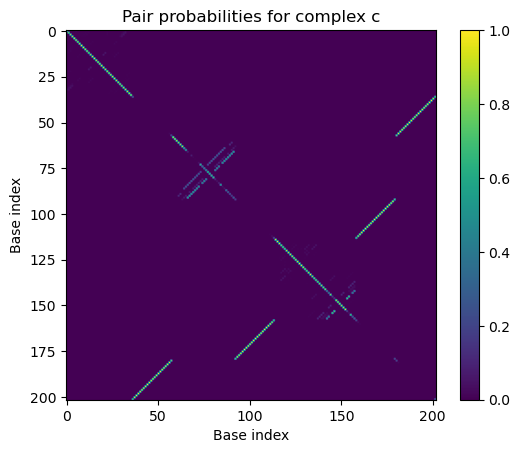

In [52]:
print(pairs(Complex([a, c, b], name='(a+c+b)'), model=model1).to_array().shape)
import matplotlib.pyplot as plt

plt.imshow(pairs(Complex([a, c, b], name='(a+c+b)'), model=model1).to_array())
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Pair probabilities for complex c')
plt.colorbar()
plt.clim(0, 1)
plt.savefig('my-figure.pdf') # optionally, save a PDF of your figure

In [11]:
import numpy as np

# Example matrix
matrix = pairs(Complex([a, c, b], name='(a+c+b)'), model=model1).to_array()

# Get non-zero values and their coordinates in each row
non_zero_values = [matrix[row, np.nonzero(matrix[row])] for row in range(matrix.shape[0])]
coordinates = [(row, col) for row in range(matrix.shape[0]) for col in np.nonzero(matrix[row])[0]]

# print("Non-zero values:", non_zero_values)
# print("Coordinates (row, col):", coordinates)


In [15]:
# seq = str.upper((df.loc[(df['Trial'] == 1) & (df['Domain_Strand'] == 'LiRA'), 'Sequence'].values)[0])
# mir21 = 'UAGCUUAUCAGACUGAUGUUGA'
# mir92a = 'UAUUGCACUUGUCCCGGCCUGU'
print(len(seq) + len(mir21) + len(mir92a))

202


In [ ]:
print(structure_probability(strands=[seq], structure=data['(a)_target'], model=model1))
print(structure_probability(strands=[seq,seq], structure=data['(a+a)_target'], model=model1))
print(structure_probability(strands=[seq,mir21], structure=data['(a+b)_target'], model=model1))
print(structure_probability(strands=[seq,mir21,mir92a], structure=data['(a+b+c)_target'], model=model1))
print(structure_probability(strands=[seq,mir92a,mir21], structure=data['(a+c+b)_target'], model=model1))
print(structure_probability(strands=[seq,mir92a], structure=data['(a+c)_target'], model=model1))

# Get to know more about probability matrix

Dalam konteks matriks n x n probabilitas, ada beberapa aspek yang dapat dihitung dan karakteristik yang penting untuk diketahui. Berikut adalah beberapa di antaranya:

1. Jumlah Probabilitas: Anda dapat menghitung jumlah semua elemen dalam matriks probabilitas untuk memastikan bahwa total probabilitasnya sama dengan 1. Jika total probabilitas tidak sama dengan 1, itu mungkin menunjukkan adanya kesalahan atau ketidakkonsistenan dalam matriks tersebut.

2. Distribusi Probabilitas Margin: Anda dapat menghitung distribusi probabilitas margin untuk setiap baris dan kolom dalam matriks. Ini memberikan informasi tentang probabilitas kejadian dalam masing-masing dimensi. Pastikan bahwa jumlah probabilitas di setiap baris dan kolom adalah 1.

3. Maksimum dan Minimum Probabilitas: Anda dapat mencari nilai maksimum dan minimum dalam matriks probabilitas untuk melihat kemungkinan kejadian paling tinggi dan paling rendah.

4. Perkalian Matriks: Anda dapat mengalikan dua matriks probabilitas untuk mendapatkan matriks hasil yang menggambarkan probabilitas perpindahan dari satu kejadian ke kejadian lainnya. Ini dapat membantu dalam analisis lanjutan seperti rantai Markov.

5. Ketergantungan: Anda dapat menganalisis ketergantungan antara kejadian-kejadian yang direpresentasikan oleh matriks probabilitas. Misalnya, Anda dapat mencari apakah suatu kejadian A bergantung pada kejadian B dengan memeriksa apakah ada elemen nol di baris A dan kolom B dalam matriks probabilitas.

6. Simetri: Anda dapat memeriksa apakah matriks probabilitas simetris, yaitu apakah elemen-elemen di diagonal utama (dari sudut kiri atas ke sudut kanan bawah) adalah nilai yang sama dengan elemen-elemen di diagonal sekunder (dari sudut kanan atas ke sudut kiri bawah). Simetri dapat memberikan wawasan tentang hubungan simetris antara kejadian dalam sistem.

7. Sifat Ergodik: Dalam konteks rantai Markov, Anda dapat menganalisis sifat ergodik matriks probabilitas. Sebuah matriks probabilitas dikatakan ergodik jika ada kemungkinan mencapai keadaan apa pun dari keadaan apa pun setelah sejumlah langkah yang cukup.

8. Keterkaitan: Anda dapat mengidentifikasi dan menganalisis keterkaitan antara elemen-elemen matriks probabilitas. Misalnya, Anda dapat mencari pola, kecenderungan, atau keterkaitan statistik dalam matriks tersebut.

9. Perubahan Probabilitas: Anda dapat melacak perubahan dalam matriks probabilitas dari waktu ke waktu atau melalui iterasi. Ini dapat membantu dalam memahami evolusi sistem probabilistik.

10. Distribusi Stasioner: Dalam rantai Markov, Anda dapat mencari vektor distribusi stasioner yang menunjukkan distribusi probabilitas setelah sistem mencapai kestabilan jangka panjang.

analisis sistem probabilistik yang direpresentasikan oleh matriks n x n probabilitas. Beberapa contoh analisis yang dapat dilakukan meliputi:

1. Mengidentifikasi Kejadian Paling Probable: Dengan melihat nilai probabilitas maksimum dalam matriks, Anda dapat mengidentifikasi kejadian yang paling mungkin terjadi dalam sistem.

2. Prediksi Perpindahan Kejadian: Dengan mengalikan matriks probabilitas dengan vektor probabilitas awal, Anda dapat memprediksi distribusi probabilitas pada langkah berikutnya. Ini berguna dalam memahami bagaimana probabilitas kejadian berubah dari satu langkah ke langkah berikutnya.

3. Analisis Stabilitas: Dengan melihat distribusi probabilitas stasioner atau mengamati perubahan probabilitas dalam matriks dari waktu ke waktu, Anda dapat menganalisis stabilitas sistem probabilistik. Ini membantu dalam memahami kecenderungan jangka panjang dan perilaku sistem.

4. Analisis Sensitivitas: Dengan memodifikasi elemen-elemen dalam matriks probabilitas, Anda dapat menganalisis sensitivitas sistem terhadap perubahan. Misalnya, Anda dapat melihat bagaimana perubahan kecil dalam probabilitas satu kejadian dapat mempengaruhi probabilitas kejadian lainnya.

5. Analisis Ketergantungan: Dengan memeriksa elemen nol dalam matriks probabilitas, Anda dapat mengidentifikasi kejadian-kejadian yang saling independen atau saling bergantung dalam sistem. Ini membantu dalam memahami keterkaitan antara kejadian-kejadian tersebut.

6. Analisis Rantai Markov: Jika matriks probabilitas merupakan matriks transisi untuk rantai Markov, Anda dapat melakukan analisis lanjutan seperti menghitung probabilitas mencapai keadaan tertentu setelah sejumlah langkah, menghitung waktu rata-rata untuk mencapai keadaan tertentu, atau mengidentifikasi keadaan-keadaan yang tidak dapat dicapai dari keadaan awal.

7. Pengoptimalan dan Pengambilan Keputusan: Dengan menggunakan matriks probabilitas, Anda dapat merancang strategi pengambilan keputusan yang optimal dalam situasi probabilistik. Misalnya, dalam teori pengambilan keputusan, matriks probabilitas digunakan untuk mengoptimalkan pemilihan tindakan berdasarkan kemungkinan hasil dan konsekuensinya.

Perhitungan dan analisis ini memberikan wawasan penting tentang karakteristik dan perilaku sistem probabilistik yang direpresentasikan oleh matriks n x n probabilitas.

# Get to know Probabilities

In [1]:
import nupack
from nupack import *
sequence = 'UCAUUACACAUCUCCUGGGCACAAGCAUCAACAUCAGUCUGAUAAGCUAUUGAGUAUUGUGCAUACAAUACACAGGCCGGGACAAGUGCAAUACUGUCCGUUGUAUAGAGGAGAUGACAAAUGGCUUC'
mir21 = 'UAGCUUAUCAGACUGAUGUUGA'
mir92a = 'UAUUGCACUUGUCCCGGCCUGU'
# specify strands
a = Strand(sequence, name='a')
b = Strand(mir21, name='b')
c = Strand(mir92a, name='c')

# specify tubes
t1 = Tube(strands={a: 1e-6, b: 1e-6, c: 1e-6}, complexes=SetSpec(max_size=3, include=[[a,b], [a,c], [a,b,c]]), name='t1')
# t2 = Tube(strands={a: 1e-10, b: 1e-9}, complexes=SetSpec(max_size=2), name='t2')

# analyze tubes
model1 = Model()
tube_results = tube_analysis(tubes=[t1], model=model1, compute=['mfe','ensemble_size'])

In [22]:
import matplotlib.pyplot as plt
import numpy as np
target = str(tube_results.complexes[Complex([b, a, c], name='(b+a+c)')].mfe[0][0]).replace("+", "")
matrix = pairs(Complex([b, a, c], name='(b+a+c)'), model=model1).to_array()
diagonal_elements = np.diag(matrix)
non_diagonal_array = matrix - diagonal_elements
prob = []
for i in range(len(target)):
    if target[i] == ')' or target[i] == '(':
        prob.append(np.max(non_diagonal_array[i]))
    elif target[i] == '.':
        prob.append(diagonal_elements[i])
    else:
        continue

In [26]:
import pandas as pd
def split_alphabets(string):
  """Splits a string into a list of lists, where each inner list contains all the occurrences of a single alphabet."""
  alphabets = []
  for char in string:
    if char not in alphabets:
      alphabets.append([char])
    else:
      alphabets[-1].append(char)
  return alphabets

target = split_alphabets(str(tube_results.complexes[Complex([b, a, c], name='(b+a+c)')].mfe[0][0]).replace("+", ""))
seq_list = split_alphabets(mir21+sequence+mir92a)
lira_manual = pd.DataFrame({'prob': prob, 'target': target, 'sequence_index': seq_list})
lira_manual.to_csv()

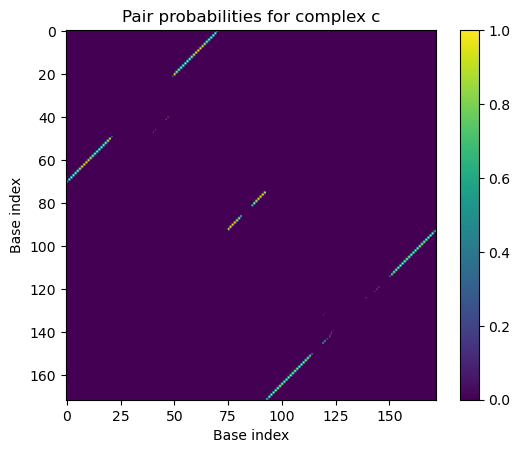

In [14]:
plt.imshow(non_diagonal_array)
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Pair probabilities for complex c')
plt.colorbar()
plt.clim(0, 1)

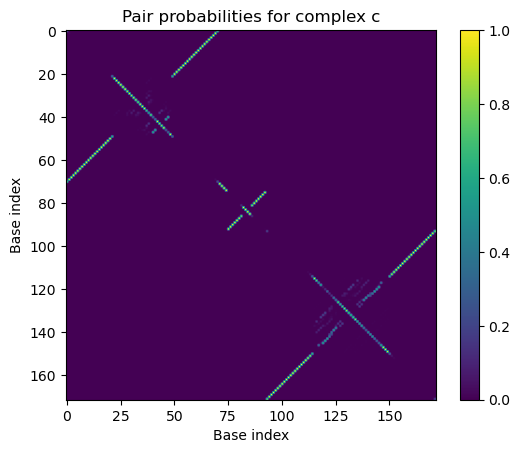

In [104]:
pairs_prob = pairs(Complex([b, a, c], name='(b+a+c)'), model=model1).to_array()
import matplotlib.pyplot as plt

plt.imshow(pairs(Complex([b, a, c], name='(b+a+c)'), model=model1).to_array())
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Pair probabilities for complex c')
plt.colorbar()
plt.clim(0, 1)
plt.savefig('my-figure.pdf') # optionally, save a PDF of your figure

In [17]:
len(get_prob(pairs_prob)[0])

172

In [19]:
pairs_prob[0]

array([9.88687007e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.83306300e-04, 0.00000000e+00, 2.79123289e-04,
       0.00000000e+00, 2.37712554e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.40721730e-05, 1.02822252e-02, 2.63097608e-04, 0.00000000e+00,
       8.79362593e-06, 0.00000000e+00, 1.01092122e-05, 1.33460666e-05,
       9.26120413e-06, 0.00000000e+00, 1.18213099e-05, 0.00000000e+00,
       0.00000000e+00, 1.22374071e-09, 1.74009321e-09, 0.00000000e+00,
       5.82842013e-14, 0.00000000e+00, 0.00000000e+00, 5.52497706e-17,
       2.66652424e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.81162120e-24, 4.77808110e-21, 0.00000000e+00, 3.99959640e-23,
       3.62932586e-23, 2.17693925e-26, 0.00000000e+00, 0.00000000e+00,
       6.49326159e-28, 0.00000000e+00, 0.00000000e+00, 2.84332976e-29,
       5.37860887e-26, 1.23991016e-29, 0.00000000e+00, 9.58401007e-30,
      

In [13]:
import numpy as np
def get_prob(matrix):
    # Get non-zero values and their coordinates in each row
    # Get maximum value and its index in each row
    max_values = [np.max(matrix[row]) for row in range(matrix.shape[0])]
    max_indices = [np.argmax(matrix[row]) for row in range(matrix.shape[0])]
    return [max_values, max_indices]

In [39]:
# off level
sum(pairs_prob[0])-max(pairs_prob[0])

0.2526738779758264

In [ ]:
# on level
on = []
for i in range(171):
    print(f'on level index {i}: {pairs_prob[i][i]}')
    on.append(pairs_prob[i][i])

In [ ]:
data

In [61]:
# data['prob_(b+a+c)']
a = mir21+sequence+mir92a
index = a.find("UAGAGGAGAUG")
index

127

In [118]:
# a[127+4]
# a[127-7]
pairs_prob[127+4][127-7]
print(pairs_prob[131][131])
sum(pairs_prob[131][132:])+sum(pairs_prob[131][:130])

0.767312689969478


0.23268731003052204

In [88]:
def split_alphabets(string):
  """Splits a string into a list of lists, where each inner list contains all the occurrences of a single alphabet."""
  alphabets = []
  for char in string:
    if char not in alphabets:
      alphabets.append([char])
    else:
      alphabets[-1].append(char)
  return alphabets

target = split_alphabets(data['(b+a+c)_target'][1+index:1+index+18])
print(len(target))
seq_list = split_alphabets(a[index:index+18])
print(seq_list)

18
[['U'], ['A'], ['G'], ['A'], ['G'], ['G'], ['A'], ['G'], ['A'], ['U'], ['G'], ['A'], ['C'], ['A'], ['A'], ['A'], ['U'], ['G']]


In [85]:
data['(b+a+c)_target']

'((((((((((((((((((((((+..................((....)).))))))))))))))))))))))....(((((((....)))))))((((((((((((((((((((((.(.(((..........))).)..............+))))))))))))))))))))))'

In [66]:
prob = data['prob_(b+a+c)'][index:index+18]

In [90]:
len(data['prob_(b+a+c)'])

172

In [89]:
import pandas as pd
pd.DataFrame({'prob': prob, 'target': target, 'sequence_index': seq_list})

,prob,target,sequence_index
0,0.746388,[.],[U]
1,0.845323,[.],[A]
2,0.923561,[.],[G]
3,0.767313,[.],[A]
4,0.731128,[)],[G]
5,0.771581,[)],[G]
6,0.876522,[)],[A]
7,0.611155,[.],[G]
8,0.557623,[)],[A]
9,0.597497,[.],[U]


In [45]:
data['prob_off_(b+a+c)']

[0.9986509367159115, 0.99902148272793, 0.9994972154034448, 0.999511617024737]

In [51]:
def get_rbs_index(c):
    a = ''
    for i in c.strands:
        a += str(i)
    rbs = "UAGAGGAGAUG"
    index = a.find(rbs)
    return(int(index))
def get_index(text):
    periods = []
    parentheses = []

    for match in re.finditer(r'\.|[()]', text):
        if match.group() == '.':
            periods.append(match.start())
        elif match.group() == '(' or match.group() == ')':
            parentheses.append(match.start())
    return periods, parentheses

def get_prob(matrix):
    # Get non-zero values and their coordinates in each row
    # Get maximum value and its index in each row
    max_values = [np.max(matrix[row]) for row in range(matrix.shape[0])]
    max_indices = [np.argmax(matrix[row]) for row in range(matrix.shape[0])]
    return [max_values, max_indices]
    
def get_probability_onoff(index, data):
    prob = []
    for i in index:
        prob.append(data[i])
    return prob

def on_off(text, data):
    periods, parentheses = get_index(text)
    prob_on  = []
    prob_off = [] 
    prob_on = get_probability_onoff(periods, data)
    prob_off = get_probability_onoff(parentheses, data)
    return(prob_on, prob_off)

def on_off_level(text, data):
    periods, parentheses = get_index(text)
    prob_on  = []
    prob_off = [] 
    prob_on = get_probability_onoff(periods, data)
    prob_off = get_probability_onoff(parentheses, data)
    on_level = sum(prob_on)/len(text)
    off_level = sum(prob_off)/len(text)
    return(off_level, on_level)
